**Import Main Libs**

---



In [40]:
# (Pandas - NumPy - Scikit-Learn - Seaborn - Matplotlib)
import pandas as pd
import numpy as np
import sklearn as sl
import matplotlib.pyplot as plt
import seaborn as sns

**Read Data**

---



In [24]:
# Read Data (Ratings)
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv("/content/u.data", sep='\t', names=rating_cols)
ratings.drop('timestamp', axis=1, inplace=True)
ratings.head()

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [25]:
# Read Data (Films)
movie_cols = ['movie_id', 'movie_title']
movies = pd.read_csv("/content/u.item", sep='|', encoding='latin-1', usecols=[0, 1], names= movie_cols, header=None)
movies.head()

,movie_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [26]:
# Read Data (Usere)
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv("/content/u.user", sep='|', names=user_cols)
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


**Merge Data**

---



In [31]:
# Merge -> Inner Join
data = pd.merge(movies, ratings, on='movie_id')
data.head()

,movie_id,movie_title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


In [32]:
# User item matrix (Card)
user_movie_matrix = data.pivot_table(index='user_id', columns='movie_title', values='rating')
user_movie_matrix.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


**User similarity**

---



In [37]:
from sklearn.metrics.pairwise import cosine_similarity

# Fill nulls with 0
matrix_filled = user_movie_matrix.fillna(0)


# Calc Similarity
user_similarity = cosine_similarity(matrix_filled)

# Store it
sim_data = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)

In [38]:
sim_data.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.168937,0.048388,0.064561,0.379670,0.429682,0.443097,0.320079,0.078385,0.377733,...,0.372213,0.119860,0.269860,0.193343,0.197949,0.118722,0.315064,0.149086,0.181612,0.399432
2,0.168937,1.000000,0.113393,0.179694,0.073623,0.242106,0.108604,0.104257,0.162470,0.161273,...,0.147095,0.310661,0.363328,0.410725,0.322713,0.231096,0.228793,0.162911,0.175273,0.106732
3,0.048388,0.113393,1.000000,0.349781,0.021592,0.074018,0.067423,0.084419,0.062039,0.066217,...,0.033885,0.043453,0.167140,0.071288,0.126278,0.026758,0.164539,0.102899,0.136757,0.026990
4,0.064561,0.179694,0.349781,1.000000,0.031804,0.068431,0.091507,0.188060,0.101284,0.060859,...,0.054615,0.036784,0.133619,0.196561,0.146058,0.030202,0.196858,0.152041,0.171538,0.058752
5,0.379670,0.073623,0.021592,0.031804,1.000000,0.238636,0.374733,0.248930,0.056847,0.201427,...,0.340183,0.080580,0.095284,0.081053,0.148607,0.071612,0.239955,0.139595,0.153799,0.313941


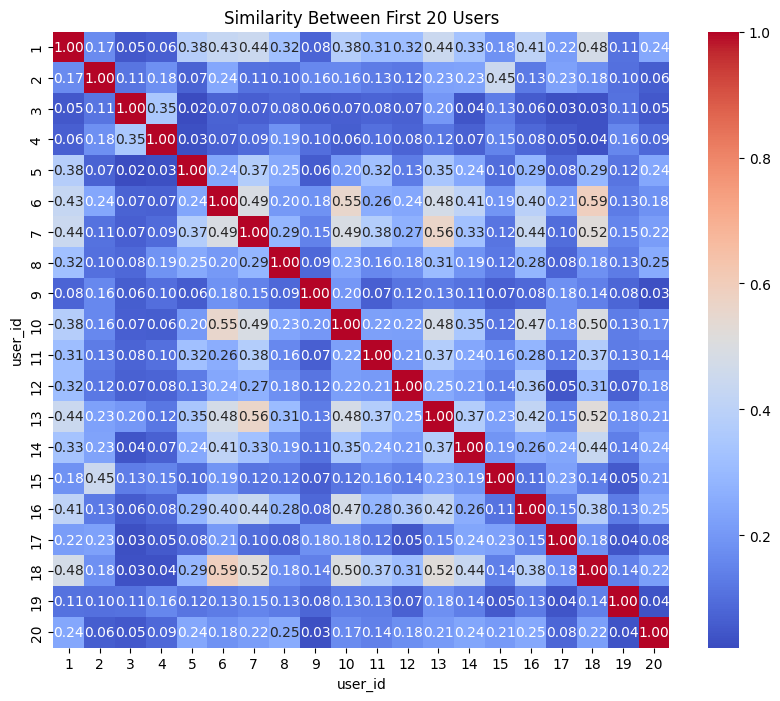

In [47]:
# Visualize First 20 Users
sample_data = sim_data.iloc[:20, :20]

plt.figure(figsize=(10, 8))
sns.heatmap(sample_data, cmap='coolwarm', square=True, annot=True, fmt=".2f")
plt.title("Similarity Between First 20 Users")
plt.show()

**Recommend ?**

---



In [48]:
# Function to recommend movies depending on users
def recommend_movies(user_id, k=5):
    user_ratings = user_movie_matrix.loc[user_id]
    similar_users = sim_data[user_id].sort_values(ascending=False).drop(user_id)

    weighted_scores = {}

    for other_user, sim_score in similar_users.items():
        other_ratings = user_movie_matrix.loc[other_user]
        for movie, rating in other_ratings.dropna().items():
            if pd.isna(user_ratings[movie]):
                weighted_scores[movie] = weighted_scores.get(movie, 0) + sim_score * rating

    recommended = sorted(weighted_scores.items(), key=lambda x: x[1], reverse=True)[:k]
    return [movie for movie, _ in recommended]

**Test**

In [53]:
recommend_movies(5)

['Pulp Fiction (1994)',
 'Godfather, The (1972)',
 'Twelve Monkeys (1995)',
 'Terminator, The (1984)',
 'Terminator 2: Judgment Day (1991)']

**Bonus**

---



In [54]:
from sklearn.metrics.pairwise import cosine_similarity

# Fill nulls with 0 and Transpose -> (Films as Rows)
movie_user_matrix = user_movie_matrix.T.fillna(0)

# Calc Similarity
item_similarity = cosine_similarity(movie_user_matrix)

# Store it
data_sim = pd.DataFrame(item_similarity, index=movie_user_matrix.index, columns=movie_user_matrix.index)

In [55]:
data_sim.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
movie_title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.000000,0.000000,0.024561,0.099561,0.185236,0.159265,0.000000,0.052203,0.000000,0.033326,...,0.000000,0.000000,0.000000,0.027774,0.118840,0.142315,0.029070,0.000000,0.110208,0.000000
1-900 (1994),0.000000,1.000000,0.014139,0.009294,0.007354,0.004702,0.010055,0.067038,0.000000,0.000000,...,0.152499,0.015484,0.000000,0.069284,0.018243,0.023408,0.006694,0.079640,0.042295,0.000000
101 Dalmatians (1996),0.024561,0.014139,1.000000,0.167006,0.061105,0.143878,0.203781,0.225803,0.027642,0.092337,...,0.000000,0.021965,0.030905,0.274877,0.204267,0.101199,0.056976,0.172155,0.045714,0.000000
12 Angry Men (1957),0.099561,0.009294,0.167006,1.000000,0.056822,0.167235,0.304078,0.422506,0.072682,0.394854,...,0.060946,0.016502,0.000000,0.403270,0.259436,0.145519,0.105226,0.038901,0.060101,0.081261
187 (1997),0.185236,0.007354,0.061105,0.056822,1.000000,0.132327,0.042928,0.065060,0.043133,0.027300,...,0.000000,0.141997,0.000000,0.068257,0.067786,0.091293,0.099490,0.025184,0.142667,0.096449


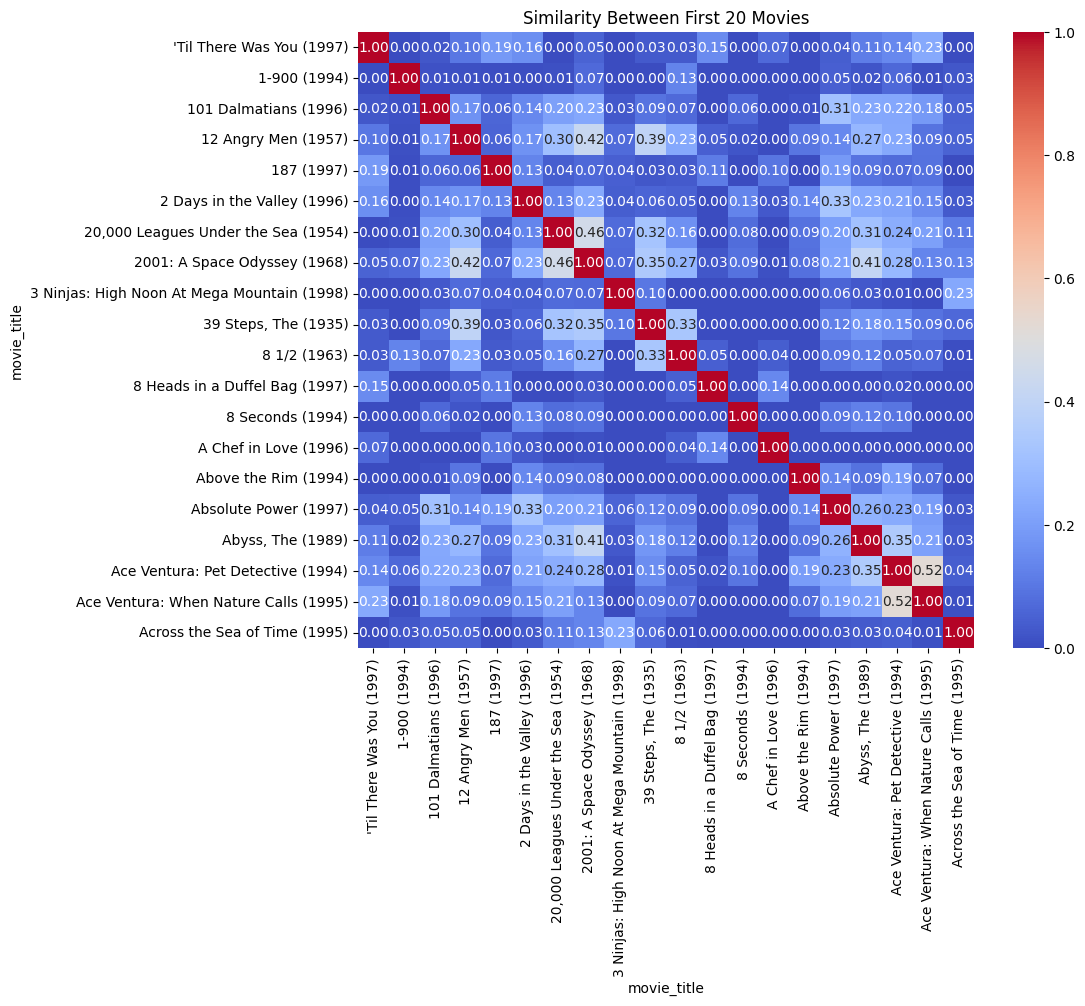

In [56]:
# Visualize First 20 Films
sample_data_2 = data_sim.iloc[:20, :20]

plt.figure(figsize=(10, 8))
sns.heatmap(sample_data_2, cmap='coolwarm', square=True, annot=True, fmt=".2f")
plt.title("Similarity Between First 20 Movies")
plt.show()

In [59]:
# Function to recommend movies depending on films
def recommend_items(user_id, k=5):
    user_ratings = user_movie_matrix.loc[user_id]
    liked_movies = user_ratings[user_ratings >= 4].dropna().index

    scores = {}

    for movie in liked_movies:
        similar_movies = data_sim[movie]
        for other_movie, sim in similar_movies.items():
            if pd.isna(user_ratings.get(other_movie)):
                scores[other_movie] = scores.get(other_movie, 0) + sim

    recommended = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:k]
    return [movie for movie, _ in recommended]

In [61]:
recommend_items(5)

['Terminator, The (1984)',
 'Terminator 2: Judgment Day (1991)',
 'Pulp Fiction (1994)',
 'Jurassic Park (1993)',
 'Groundhog Day (1993)']

In [65]:
from sklearn.decomposition import TruncatedSVD

matrix_filled = user_movie_matrix.fillna(0)

svd = TruncatedSVD(n_components=20, random_state=42)
latent_matrix = svd.fit_transform(matrix_filled)

# Build new matrix
reconstructed_matrix = svd.inverse_transform(latent_matrix)

predicted_ratings = pd.DataFrame(reconstructed_matrix, index=user_movie_matrix.index, columns=user_movie_matrix.columns)

# Step 1: Clip
predicted_ratings_clipped = predicted_ratings.clip(lower=1, upper=5)

# Step 2: Round
predicted_ratings_rounded = predicted_ratings_clipped.round()

In [72]:
predicted_ratings_rounded.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,...,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0


In [73]:
# Function to recommend movies depending on predicted ratings
def recommend_svd(user_id, k=5):
    user_pred = predicted_ratings.loc[user_id]
    already_rated = user_movie_matrix.loc[user_id].dropna().index
    user_pred = user_pred.drop(already_rated)
    top_movies = user_pred.sort_values(ascending=False).head(k)
    return list(top_movies.index)

In [74]:
recommend_svd(5)

['Brazil (1985)',
 'Groundhog Day (1993)',
 'Twelve Monkeys (1995)',
 'Nightmare Before Christmas, The (1993)',
 'Raising Arizona (1987)']